## Notes
1. Torchaudio requires soundfile to be installed. [`pip install soundfile`]

## Load

Sample Rate: 44100
Shape: (1, 4960256)
Dtype: torch.float32
 - Max:      0.364
 - Min:     -0.276
 - Mean:    -0.000
 - Std Dev:  0.021

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0013, 0.0010, 0.0013]])



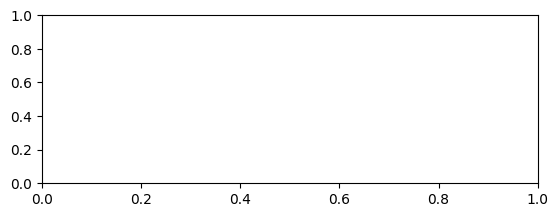

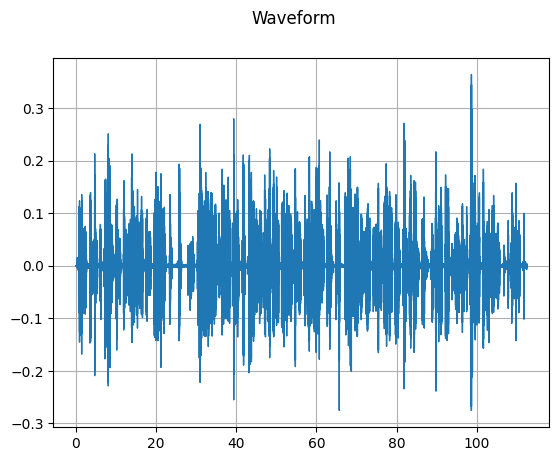

o:\Programs\Python\3_11_6\Lib\site-packages\matplotlib\axes\_axes.py:7944: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


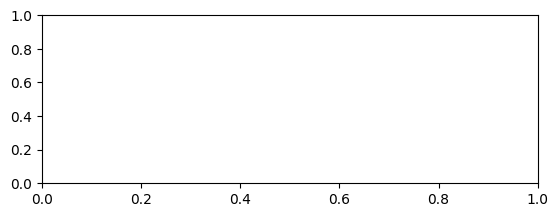

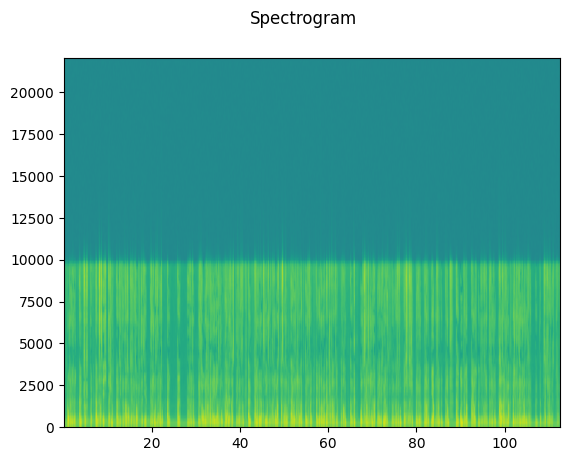

In [2]:
from matplotlib import pyplot as plt
import torchaudio
from utils import print_stats, plot_waveform, plot_specgram

waveform, sample_rate = torchaudio.load("sample.wav", format="wav")

print_stats(waveform, sample_rate=sample_rate)
plt.subplot(2, 1, 1)
plot_waveform(waveform, sample_rate)
plt.subplot(2, 1, 2)
plot_specgram(waveform, sample_rate)

In [5]:
# Slicing
offset, num_frames = 0, 44100

# Intuitive way:
waveform_slice1 = waveform[:, offset:(offset+num_frames)]

# Probably more efficient:
waveform_slice2, sample_rate = torchaudio.load("sample.wav", format="wav", frame_offset=offset, num_frames=num_frames)

(waveform_slice1 == waveform_slice2).all()

tensor(True)

## Save


In [ ]:

# To file
import io


torchaudio.save("output.wav", waveform, sample_rate=sample_rate)

# To buffer
buffer = io.BytesIO()
torchaudio.save(buffer, waveform, sample_rate=sample_rate, format="wav")

buffer.getvalue()[:50]

## Resampling

In [ ]:
resample_rate = 16000

waveform, sample_rate = torchaudio.load("sample.wav", format="wav")